In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml("mnist_784",version=1)

In [7]:
[x for x in mnist.keys()]

['data',
 'target',
 'frame',
 'categories',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'url']

In [8]:
X=mnist["data"]
y=mnist["target"]

In [9]:
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

In [11]:
some_data=X[8]
some=some_data.reshape(28,28)

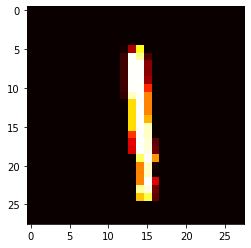

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.imshow(some,cmap="hot",interpolation="nearest")
plt.show()

In [14]:
y[8]

'1'

In [16]:
import numpy as np
y=y.astype(np.uint8)

In [19]:
#spliting our data

In [20]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [21]:
#trainning a binary classier for 2

In [22]:
y_train_2=(y_train==2)
y_test_2=(y_test==2)

In [23]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_2)

SGDClassifier(random_state=42)

In [24]:
sgd_clf.predict([some_data])

array([False])

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
stratified=StratifiedKFold(n_splits=3,random_state=42)
for train_index,test_index in stratified.split(X_train,y_train_2):
    clone_clf=clone(sgd_clf)
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_2[train_index]
    X_test_folds=X_train[test_index]
    y_test_folds=y_train_2[test_index]
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_folds)
    n_correct=sum(y_pred==y_test_folds)
    print(n_correct/len(y_pred))

c:\users\14379\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.96645
0.95895
0.904


In [27]:
#lol 95 percent accuracy 

In [28]:
from sklearn.base import BaseEstimator
class my_checker(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype="bool")

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_2,cv=3,scoring="accuracy")

array([0.96645, 0.95895, 0.904  ])

In [34]:
my_clf=my_checker()

In [35]:
cross_val_score(my_clf,X_train,y_train_2,cv=3,scoring="accuracy")

array([0.90355, 0.8993 , 0.89925])

In [36]:
#ummm biased data so how to calculate its perfomance metrices bcoz accuracy is not good for them 

In [38]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_2,cv=3)

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_2,y_train_pred)

array([[51538,  2504],
       [  908,  5050]], dtype=int64)

In [42]:
#its tell us good lets see other 

In [44]:
from sklearn.metrics import precision_score,recall_score
print("Precision is :-",precision_score(y_train_2,y_train_pred))
print("Recall is :-",recall_score(y_train_2,y_train_pred))


Precision is :- 0.6685199894095843
Recall is :- 0.8475998657267539


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_train_2,y_train_pred))

              precision    recall  f1-score   support

       False       0.98      0.95      0.97     54042
        True       0.67      0.85      0.75      5958

    accuracy                           0.94     60000
   macro avg       0.83      0.90      0.86     60000
weighted avg       0.95      0.94      0.95     60000



In [50]:
y_scores=sgd_clf.decision_function([some_data])
thresh=0
y_scores>thresh

array([False])

In [52]:
y_scores

array([-3508.31923794])

In [53]:
y_scores_all=cross_val_predict(sgd_clf,X_train,y_train_2,cv=3,method="decision_function")

In [55]:
from sklearn.metrics import precision_recall_curve
precision,recall,threshhold=precision_recall_curve(y_train_2,y_scores_all)

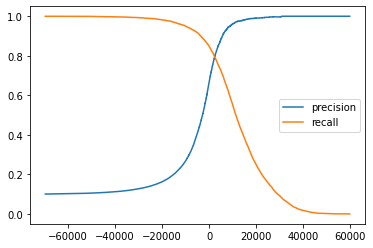

In [58]:
plt.plot(threshhold,precision[:-1],label="precision")
plt.plot(threshhold,recall[:-1],label="recall")
plt.legend(loc="best")
plt.show()

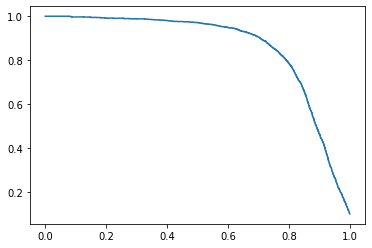

In [60]:
plt.plot(recall,precision)
plt.show()

In [62]:
threshhold_89=threshhold[np.argmax(precision>=0.89)]

In [63]:
y_train_pred_89=(y_scores_all>=threshhold_89)

In [64]:
precision_score(y_train_2,y_train_pred_89)

0.8900709219858156

In [65]:
recall_score(y_train_2,y_train_pred_89)

0.7161799261497147

In [66]:
from sklearn.metrics import roc_curve
fpr,tpr,threhold=roc_curve(y_train_2,y_scores_all)

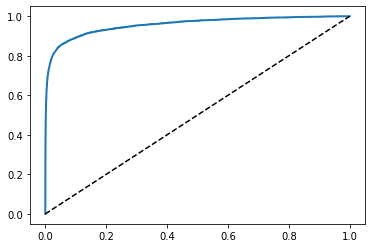

In [67]:
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],"k--")
plt.show()

In [68]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_2,y_scores_all)

0.9568395257681235

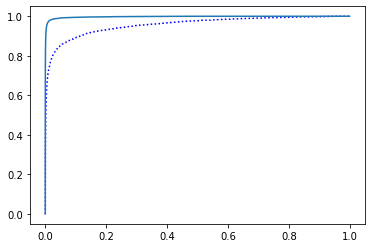

In [69]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_2, cv=3,method="predict_proba")
""""But to plot a ROC curve, you need scores, not probabilities. A simple solution is to
use the positive class’s probability as the score:"""
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_2,y_scores_forest)
#Now you are ready to plot the ROC curve. It is useful to plot the first ROC curve as
#well to see how they compare (Figure 3-7):
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, label="Random Forest")
plt.show()

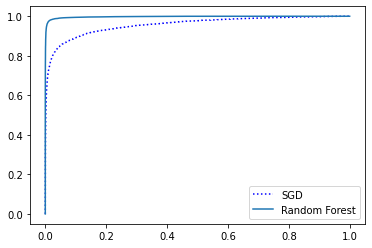

In [70]:
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, label="Random Forest")
plt.legend(loc="best")
plt.show()

In [71]:
roc_auc_score(y_train_2,y_scores_forest)

0.9976087190102003